<a href="https://colab.research.google.com/github/ttobaegi/Tensorflow-developers-certificate/blob/main/Convolutional_Neural_Networks_in_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Data Augmentation](https://www.tensorflow.org/tutorials/images/data_augmentation)

In [ ]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

In [ ]:
# Cats-v-Dogs dataset
!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip" \
    -O "/tmp/cats-and-dogs.zip"

local_zip = '/tmp/cats-and-dogs.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

--2021-09-29 15:36:56--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.219.32.233, 2600:1417:76:293::e59, 2600:1417:76:2aa::e59
Connecting to download.microsoft.com (download.microsoft.com)|23.219.32.233|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.68M   150MB/s    in 5.4s    

2021-09-29 15:37:01 (147 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824894548/824894548]



In [ ]:
print(len(os.listdir('/tmp/PetImages/Cat/')))
print(len(os.listdir('/tmp/PetImages/Dog/')))

12501
12501


In [ ]:
# 1. directories for cats-v-dogs
# 2. subdirectories for training and testing

In [ ]:
# Write a python function called split_data which takes
# a SOURCE directory containing the files
# a TRAINING directory that a portion of the files will be copied to
# a TESTING directory that a portion of the files will be copie to
# a SPLIT SIZE to determine the portion

# The files should also be randomized, so that the training set is a random
# X% of the files, and the test set is the remaining files

# SO, for example, if SOURCE is PetImages/Cat, and SPLIT SIZE is .9
# Then 90% of the images in PetImages/Cat will be copied to the TRAINING dir
# and 10% of the images will be copied to the TESTING dir

# Also -- All images should be checked, and if they have a zero file length,
# they will not be copied over
#
# os.listdir(DIRECTORY) gives you a listing of the contents of that directory
# os.path.getsize(PATH) gives you the size of the file
# copyfile(source, destination) copies a file from source to destination
# random.sample(list, len(list)) shuffles a list

In [ ]:
# 생성된 데이터를 저장할 하위 디렉토리를 만든다
try :
  # directories for cats-v-dogs
  os.mkdir('/tmp/cats-v-dogs/')
  # subdirectories for training and testing
  os.mkdir('/tmp/cats-v-dogs/training/')
  os.mkdir('/tmp/cats-v-dogs/testing/')
  os.mkdir('/tmp/cats-v-dogs/training/cats/')
  os.mkdir('/tmp/cats-v-dogs/training/dogs/')
  os.mkdir('/tmp/cats-v-dogs/testing/cats/')
  os.mkdir('/tmp/cats-v-dogs/testing/dogs/')

except OSError :
  pass

In [ ]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE) :
  files = []
  for filename in os.listdir(SOURCE) :
    file = SOURCE + filename
    if os.path.getsize(file) > 0 :
      files.append(filename)
    else :
        print(filename + ' is zero length, so ignoring')
  training_length = int(len(files) * SPLIT_SIZE)
  testing_length = int(len(files) - training_length)
  shuffled_set = random.sample(files, len(files))
  training_set = shuffled_set[0:training_length]
  testing_set = shuffled_set[:testing_length]
  
  for filename in training_set :
    this_file = SOURCE + filename
    destination = TRAINING +filename
    copyfile(this_file, destination)

  for filename in testing_set :
    this_file = SOURCE + filename
    destination = TESTING +filename
    copyfile(this_file, destination)  

In [ ]:
CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
TRAINING_CATS_DIR = "/tmp/cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "/tmp/cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"
TRAINING_DOGS_DIR = "/tmp/cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "/tmp/cats-v-dogs/testing/dogs/"

In [ ]:
split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

666.jpg is zero length, so ignoring
11702.jpg is zero length, so ignoring


In [ ]:
print(len(os.listdir('/tmp/cats-v-dogs/training/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/training/dogs/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/dogs/')))

11250
11250
1250
1250


In [ ]:
TRAINING_DIR = "/tmp/cats-v-dogs/training/"
# Experiment with your own parameters here to really try to drive it to 99.9% accuracy or better
train_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=100,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

VALIDATION_DIR = "/tmp/cats-v-dogs/testing/"
# Experiment with your own parameters here to really try to drive it to 99.9% accuracy or better
validation_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=100,
                                                              class_mode='binary',
                                                              target_size=(150, 150))

Found 22500 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [ ]:
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
#x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)
x.shape

(273, 216, 3)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

img = load_img('/tmp/cats-v-dogs/training/dogs/7965.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, 
                          batch_size=30,
                          save_to_dir='/preview', 
                          save_prefix='dog', 
                          save_format='jpg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

# 3 - Transfer Learning

https://www.tensorflow.org/api_docs/python/tf/keras/applications/inception_v3

In [ ]:
import os
from tensorflow.keras import layers
from tensorflow.keras import Model

# 사전 훈련된 가중치 다운로드 : InceptionV3 
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2021-09-30 03:49:20--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.191.128, 173.194.74.128, 209.85.145.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.191.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   193MB/s    in 0.4s    

2021-09-30 03:49:21 (193 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
# 사전 훈련된 가중치 로드 : InceptionV3 
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(# include_top = False인 경우 지정 필요
                                input_shape = (150, 150, 3),
                                # whether to include the fully-connected layer (last layer) at the top
                                include_top = False,
                                # None : random initialization OR imagenet (pre-training on ImageNet default)
                                weights = None)
pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers :
  # layer의 가중치 훈련 가능 여부 
  layer.trainable = False

# 모델 구조
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [ ]:
# 'mixed7'이라는 이름의 레이어를 가져와 사전 훈련된 신경망 모델의 마지막 레이어로 설정
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [ ]:
# 최적화 알고리즘
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer(last_layer) to 1D
x = layers.Flatten()(last_output)
# Fully Connected layer with 1024 hidden units & ReLU activation
x = layers.Dense(1024, activation = 'relu')(x)
# Dropout rate = 0.2
x = layers.Dropout(0.2)(x)
# Final sigmoid layer for classification
x = layers.Dense(1, activation = 'sigmoid')(x)

model = Model(pre_trained_model.input, x)

model.compile(optimizer = RMSprop(learning_rate = 0.0001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
!gdown --id 1RL0T7Rg4XqQNRCkjfnLo4goOJQ7XZro9

Downloading...
From: https://drive.google.com/uc?id=1RL0T7Rg4XqQNRCkjfnLo4goOJQ7XZro9
To: /content/cats_and_dogs_filtered.zip
68.6MB [00:00, 70.8MB/s]


In [ ]:
import os
import zipfile

zip_ref = zipfile.ZipFile("./cats_and_dogs_filtered.zip", 'r')
zip_ref.extractall("tmp/")
zip_ref.close()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define our example directories and files
base_dir = 'tmp/cats_and_dogs_filtered'

train_dir = os.path.join( base_dir, 'train')
validation_dir = os.path.join( base_dir, 'validation')


train_cats_dir = os.path.join(train_dir, 'cats') # Directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs') # Directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats') # Directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')# Directory with our validation dog pictures

train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary', 
                                                    target_size = (150, 150))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 20,
                                                          class_mode  = 'binary', 
                                                          target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit(
  train_generator,
  validation_data=validation_generator,
  steps_per_epoch=100,
  epochs=20,
  validation_steps=50,
  verbose=2
)

Epoch 1/20
100/100 - 165s - loss: 0.3474 - accuracy: 0.8590 - val_loss: 0.1221 - val_accuracy: 0.9490
Epoch 2/20
100/100 - 157s - loss: 0.2164 - accuracy: 0.9150 - val_loss: 0.1193 - val_accuracy: 0.9580
Epoch 3/20
100/100 - 157s - loss: 0.2286 - accuracy: 0.9085 - val_loss: 0.1057 - val_accuracy: 0.9590
Epoch 4/20
100/100 - 157s - loss: 0.1855 - accuracy: 0.9330 - val_loss: 0.1855 - val_accuracy: 0.9450
Epoch 5/20
100/100 - 156s - loss: 0.1712 - accuracy: 0.9420 - val_loss: 0.0909 - val_accuracy: 0.9740
Epoch 6/20
100/100 - 156s - loss: 0.1761 - accuracy: 0.9420 - val_loss: 0.0993 - val_accuracy: 0.9650
Epoch 7/20
100/100 - 156s - loss: 0.1687 - accuracy: 0.9425 - val_loss: 0.1567 - val_accuracy: 0.9540
Epoch 8/20
100/100 - 156s - loss: 0.1859 - accuracy: 0.9410 - val_loss: 0.0990 - val_accuracy: 0.9650
Epoch 9/20
100/100 - 157s - loss: 0.1877 - accuracy: 0.9360 - val_loss: 0.1154 - val_accuracy: 0.9600
Epoch 10/20
100/100 - 157s - loss: 0.1452 - accuracy: 0.9495 - val_loss: 0.1096 - 

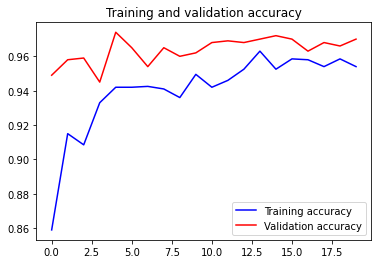

<Figure size 432x288 with 0 Axes>

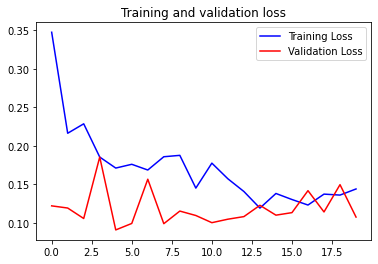

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()


plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# 4 - Multiclass Classifications

## 4.1 - Load Dataset
Rock-Paper-Scissors dataset

In [ ]:
# rps training set
!gdown --id 1DYVMuV2I_fA6A3er-mgTavrzKuxwpvKV
# rps testing set
!gdown --id 1RaodrRK1K03J_dGiLu8raeUynwmIbUaM

Downloading...
From: https://drive.google.com/uc?id=1DYVMuV2I_fA6A3er-mgTavrzKuxwpvKV
To: /content/rps.zip
201MB [00:01, 120MB/s]
Downloading...
From: https://drive.google.com/uc?id=1RaodrRK1K03J_dGiLu8raeUynwmIbUaM
To: /content/rps-test-set.zip
29.5MB [00:00, 137MB/s]


In [ ]:
import os
import zipfile

local_zip = './rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/rps-train')
zip_ref.close()

local_zip = './rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/rps-test')
zip_ref.close()

In [ ]:
base_dir = 'tmp/rps-train/rps'

rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock03-008.png', 'rock03-017.png', 'rock02-039.png', 'rock05ck01-052.png', 'rock03-029.png', 'rock07-k03-080.png', 'rock01-010.png', 'rock05ck01-108.png', 'rock05ck01-017.png', 'rock02-064.png']
['paper01-000.png', 'paper02-036.png', 'paper03-058.png', 'paper02-064.png', 'paper02-063.png', 'paper04-038.png', 'paper07-052.png', 'paper07-032.png', 'paper05-091.png', 'paper07-043.png']
['scissors04-108.png', 'scissors03-072.png', 'testscissors03-030.png', 'testscissors01-024.png', 'testscissors02-118.png', 'testscissors02-007.png', 'scissors04-053.png', 'scissors03-077.png', 'scissors03-052.png', 'scissors01-082.png']


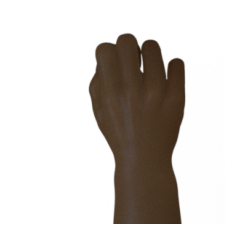

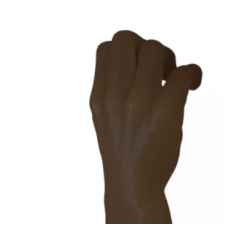

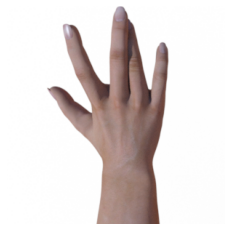

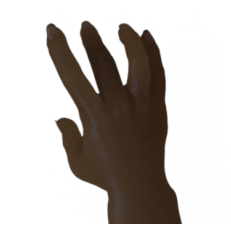

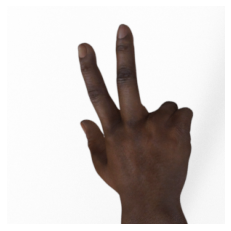

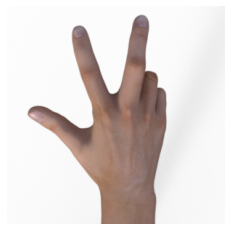

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 1

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [ ]:
# Data Augmentation for Training Data
TRAINING_DIR = 'tmp/rps-train/rps'
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = .2,
    height_shift_range = .2,
    shear_range = .2,
    zoom_range = .2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size = (150,150),
    class_mode = 'categorical',
    batch_size = 126
)

Found 2520 images belonging to 3 classes.


In [ ]:
# Rescaling & Resizing Validation Data
VALIDATION_DIR = 'tmp/rps-test/rps-test-set'
validation_datagen = ImageDataGenerator(rescale = 1./255)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

Found 372 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
                                    # 1st Conv layer
                                    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (150, 150, 3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    # 2nd Conv layer
                                    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    # 3rd Conv layer
                                    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    # 4th layer
                                    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    # Flatten & Dropout
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dropout(.5),
                                    # 2 FC layers
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    tf.keras.layers.Dense(3, activation = 'softmax')  # multi-class classification
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_94 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_96 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_97 (Conv2D)           (None, 15, 15, 128)       1

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

model.save("rps.h5")

Epoch 1/25
20/20 [==============================] - 190s 9s/step - loss: 1.2411 - accuracy: 0.3774 - val_loss: 1.3694 - val_accuracy: 0.3333
Epoch 2/25
20/20 [==============================] - 187s 9s/step - loss: 1.1082 - accuracy: 0.3984 - val_loss: 0.9190 - val_accuracy: 0.5296
Epoch 3/25
20/20 [==============================] - 187s 9s/step - loss: 1.1420 - accuracy: 0.4012 - val_loss: 1.0322 - val_accuracy: 0.3898
Epoch 4/25
20/20 [==============================] - 185s 9s/step - loss: 1.0196 - accuracy: 0.5250 - val_loss: 0.8204 - val_accuracy: 0.6210
Epoch 5/25
20/20 [==============================] - 185s 9s/step - loss: 0.8996 - accuracy: 0.5778 - val_loss: 0.4747 - val_accuracy: 0.9167
Epoch 6/25
20/20 [==============================] - 187s 9s/step - loss: 0.7749 - accuracy: 0.6690 - val_loss: 0.8258 - val_accuracy: 0.5672
Epoch 7/25
20/20 [==============================] - 187s 9s/step - loss: 0.6506 - accuracy: 0.7135 - val_loss: 0.4650 - val_accuracy: 0.8790
Epoch 8/25
20

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()